# Entry 30 notebook - Learning Curves

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import openml
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
house_16H = openml.datasets.get_dataset(574).get_data()[0]
house_16H.head()

,P1,P5p1,P6p2,P11p4,P14p9,P15p1,P15p3,P16p2,P18p2,P27p4,H2p2,H8p2,H10p1,H13p1,H18pA,H40p4,price
0,15512.0,0.460869,0.049252,0.226470,0.149827,0.752837,0.010057,0.579729,0.003251,0.075912,0.625318,0.036613,0.991377,0.260116,0.052246,0.774059,130600.0
1,1550.0,0.470968,0.002581,0.137419,0.096341,0.862581,0.000000,0.695142,0.005025,0.043551,0.064263,0.003350,0.994975,0.285266,0.060606,0.142857,40500.0
2,4741.0,0.485341,0.000211,0.189412,0.135656,0.856992,0.000000,0.683584,0.004143,0.027965,0.065796,0.000000,0.997411,0.315433,0.065116,0.687500,28700.0
3,467.0,0.498929,0.000000,0.100642,0.085470,0.907923,0.000000,0.780488,0.006098,0.018293,0.057471,0.000000,1.000000,0.149425,0.139535,1.000000,28500.0
4,310.0,0.474193,0.680645,0.225806,0.128834,0.896774,0.000000,0.756302,0.008403,0.016807,0.077519,0.672269,0.991597,0.147287,0.000000,0.000000,24100.0


In [7]:
def train_model(model, X, y):
    train_errors, test_errors = [], []
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))
    return train_errors, test_errors

In [228]:
def plot_learning_curves(train_errors, test_errors):
    plt.plot(np.sqrt(train_errors), "r-", linewidth=2, label="train")
    plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="test")
    plt.axis([0, len(test_errors), np.sqrt(min(train_errors)), np.sqrt(max(test_errors))*.05])
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.legend()

In [215]:
lin_reg = LinearRegression()
train_errors, test_errors = train_model(lin_reg, house_16H.drop('price', axis=1), house_16H['price'])

In [246]:
def plot_learning_curves1(train_errors, test_errors):
    plt.plot(np.sqrt(train_errors), "r-", linewidth=2, label="train")
    plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="test")
    plt.axis([0, len(test_errors), 40000, np.sqrt(max(test_errors))*.45])
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.legend()

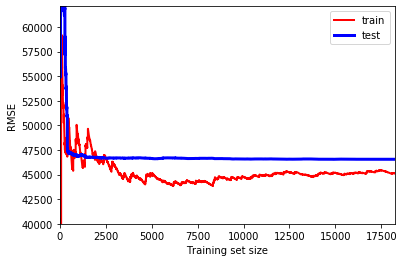

In [247]:
plot_learning_curves1(train_errors, test_errors)

In [10]:
house_16H.describe()

,P1,P5p1,P6p2,P11p4,P14p9,P15p1,P15p3,P16p2,P18p2,P27p4,H2p2,H8p2,H10p1,H13p1,H18pA,H40p4,price
count,2.278400e+04,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000
mean,7.808669e+03,0.482297,0.063982,0.163900,0.121538,0.851076,0.020487,0.716131,0.003589,0.033263,0.110527,0.057437,0.967045,0.304993,0.107377,0.491626,50074.439782
std,6.587242e+04,0.031876,0.150921,0.080461,0.056687,0.079455,0.057666,0.087264,0.005100,0.029567,0.105925,0.139811,0.099953,0.133998,0.090065,0.331655,52843.475551
min,2.000000e+00,0.125000,0.000000,0.000000,0.000000,0.054156,0.000000,0.233702,0.000000,0.000000,0.000000,0.000000,0.003257,0.000000,0.000000,0.000000,0.000000
25%,4.270000e+02,0.464647,0.000000,0.112069,0.081236,0.819686,0.000000,0.662283,0.000000,0.016260,0.049303,0.000000,0.981410,0.221673,0.052770,0.243243,21000.000000
50%,1.345500e+03,0.480396,0.003413,0.155485,0.117127,0.863645,0.000000,0.714286,0.002591,0.027523,0.081179,0.002538,0.994100,0.299800,0.086957,0.500000,33200.000000
75%,4.518250e+03,0.496040,0.033376,0.203596,0.156757,0.899657,0.019196,0.771039,0.005007,0.042827,0.131430,0.029928,1.000000,0.375000,0.137931,0.750000,56100.000000
max,7.322564e+06,0.923077,1.000000,0.917255,0.511872,1.000000,0.943325,1.000000,0.125000,0.705736,0.975177,1.000000,1.000000,1.000000,1.000000,1.000000,500001.000000


## Center and scale

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(house_16H.drop('price', axis=1))

In [12]:
lin_reg2 = LinearRegression()
scaled_train_e, scaled_test_e = train_model(lin_reg2, scaled_X, house_16H['price'])

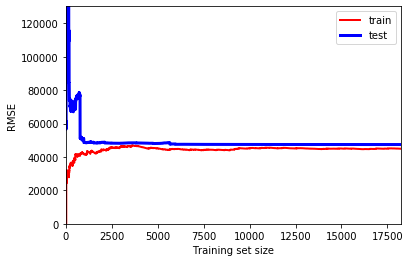

In [217]:
plot_learning_curves(scaled_train_e, scaled_test_e)

In [15]:
import mglearn

X, y = mglearn.datasets.load_extended_boston()

//anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [51]:
boston_lin_reg = LinearRegression()
b_train_errors, b_test_errors = train_model(boston_lin_reg, X, y)

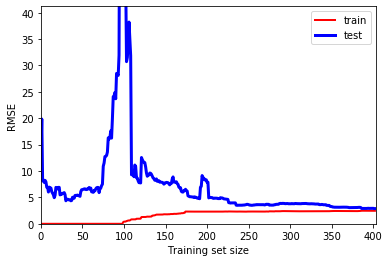

In [52]:
plot_learning_curves(b_train_errors, b_test_errors)

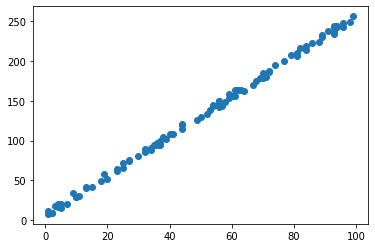

In [17]:
line_X = np.around(np.random.rand(100, 1) * 100, 0)
line_y = np.around(2.5 * line_X + 7 + (np.random.randint(-5, 5, 100).reshape(-1, 1)), 0)
plt.scatter(line_X, line_y)

In [65]:
line_lin_reg = LinearRegression()
line_train_errors, line_test_errors = train_model(line_lin_reg, line_X, line_y)

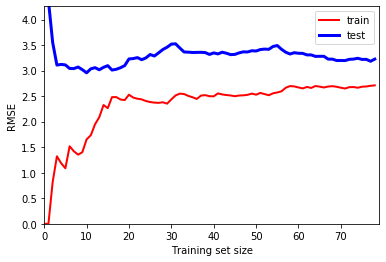

In [66]:
plot_learning_curves(line_train_errors, line_test_errors)